In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import warnings
import bs4
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_alexa.tsv',sep='\t')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/amazon_alexa.tsv'

In [ ]:
data.head()


In [ ]:
data.info()


In [ ]:
data[data.feedback==0].head(30)

In [ ]:
print(data.isnull().sum())

In [ ]:
 df = pd.DataFrame(data)
#making it a dataframe

In [ ]:
df.groupby('feedback').describe()

In [ ]:
#change text lower cases and removal of white spaces
X = df['verified_reviews']
Y = df['feedback']

In [ ]:
lower_text = []
for i in range(0,len(X)):
    s = str(X[i])
    s1 = s.strip()
    lower_text.append(s1.lower())
print('After converting text to lower case\n\n',lower_text)



In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"didn\t", " not", phrase)
    phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ve", " have", phrase)
    phrase = re.sub('[^A-Za-z]+', ' ', phrase)

    return phrase

s4 = []
for i in range(0,len(lower_text)):
    s2 = lower_text[i]
    s3 = s2.strip()
    ss = decontracted(s3)
    s4.append(ss)

print('After correcting decontractions\n\n',s4)


In [ ]:
#Remove punctuation


In [ ]:
punc_text = []
for i in range(0,len(s4)):
    test_str = (s4[i])
    res = re.sub(r'[^\w\s]', '', test_str)
    punc_text.append(res)
print('After removed punctuation\n\n',punc_text)

In [ ]:
def clean_text(sentance):
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    return sentance.strip()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words = set(stopwords.words('english'))


In [ ]:
#Word vector conversion
#most important
#Initialize the TF-IDF vectorizer
#Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
#When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
#If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

#The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True,norm="l2",ngram_range=(1, 2),stop_words=my_stop_words)

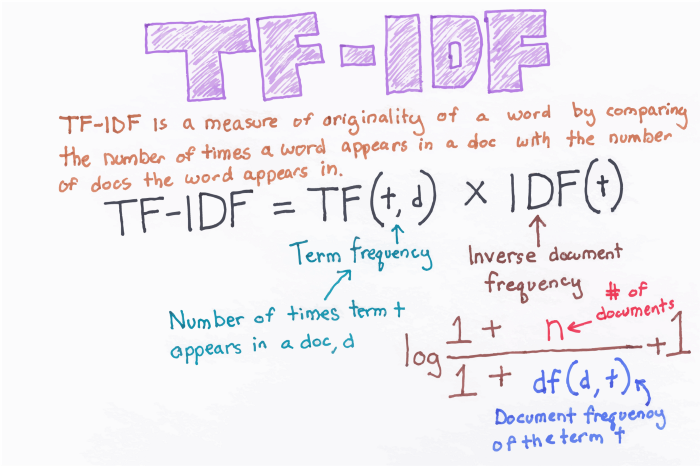

In [ ]:
#transform independent variable using TF-IDF vectorizer

In [ ]:
X_tfidf = tfidf.fit_transform(punc_text)
print('After vectorized text data\n\n',X_tfidf)

In [ ]:
print(tfidf.get_feature_names())

In [ ]:
# data goes into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y,  test_size = 0.20, random_state = 0)

In [ ]:
#Print training data
print('Training data\n\n',X_train,'\n',y_train)
print('\n\n')

#Print testing data
print('Testing data\n\n',X_test)
print('\n\n')

In [ ]:
rr = dict(zip(tfidf.fit(punc_text).get_feature_names(), tfidf.idf_))
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)

# showing only top 20 tokens

token_weight = token_weight[0:20]
sns.barplot(x='token', y='weight', data=token_weight)
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(30,5)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

|  |  |
| --| -- |
| 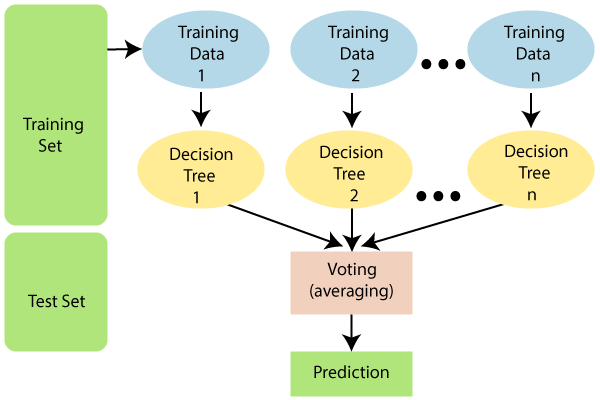 | 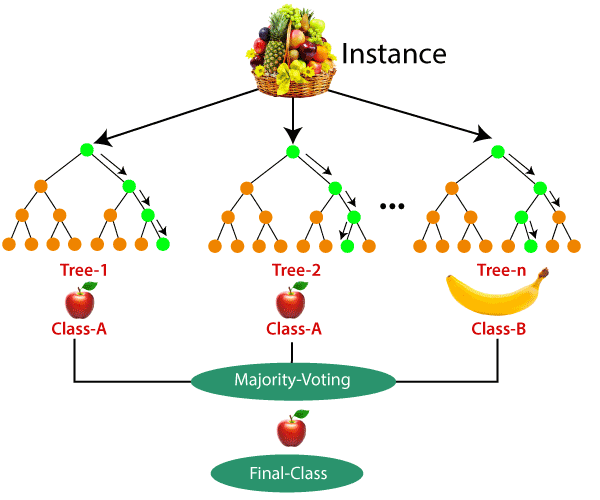 |

The random forest algorithm works by completing the following steps:

Step 1: The algorithm select random samples from the dataset provided.

Step 2: The algorithm will create a decision tree for each sample selected. Then it will get a prediction result from each decision tree created.

Step 3: Voting will then be performed for every predicted result. For a classification problem, it will use mode, and for a regression problem, it will use mean.

Step 4: And finally, the algorithm will select the most voted prediction result as the final prediction.

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import precision_score
# calculate prediction
precision = precision_score(y_test, y_pred, average='binary')

In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print(score)

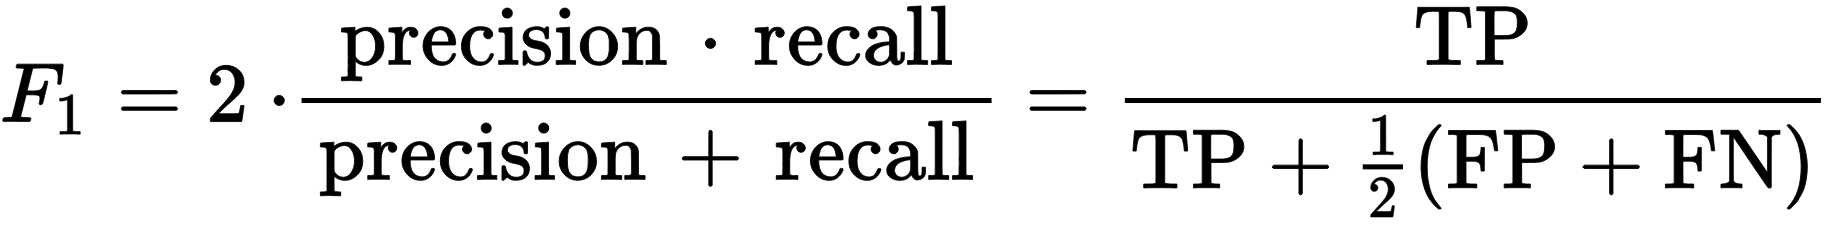

In [ ]:
#USING SVM LINEAR CLASSIFIER
clf = LinearSVC()
#The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide,
#returning a "best fit" hyperplane that divides,
#or categorizes, your data. you can then feed some features to your classifier to see what the "predicted" class is.

In [ ]:
clf.fit(X_train, y_train)
    #Fit train and test into the model

In [ ]:
#Predict the result
y__pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

precision = precision_score(y_test, y__pred, average='binary')

score = f1_score(y_test, y__pred, average='binary')
print(score)

In [ ]:
def predict(string):

    review_text= decontracted(string)
    review_text = clean_text(string)
    print('Preprocessed text\t\n',review_text.lower())

    test_vect = tfidf.transform(([review_text]))
    pred = clf.predict(test_vect)
    print('After vectorized text data\t\n',test_vect)
    print(pred[0],"\n")
    if (pred[0]==1):
        prediction = "Positive"
    else:
        prediction = "Negative"
    return prediction

In [ ]:
predict("It's like Siri, in fact, Siri answers more acc...")


In [ ]:
predict("Does not work as thought ")

In [ ]:
predict("Sometimes while playing a game, you can answer..")

In [ ]:
predict("I love it wife hates it")

In [ ]:
predict("i sent it to my 85 year old dad and he talks to it constantly")

In [ ]:
predict("Item no longer works after just 5 months of us...")

In [ ]:
predict("Very cheap")

In [ ]:
predict("this product is absolute garbage but at the same time it works perfectly")